# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 26,856 vaults in the database and 5,992,906 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 399,501 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2025-08-20 10:45:30  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-08-27 14:29:29  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-12-10 19:39:45  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-12-25 01:09:32  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   

                                                        address  block_number  \
timestamp                                                                       
2025-08-20 10:45:30  0x000a70c4887cc3974de7535623209ca01a215c50     370385921   
2025-08-27 14:29:29  0x000a70c4887cc3974de7535623209ca01a215c50     372862721   
2025-12-10 19:39:45  0x000a70c4887cc3974de7535623209ca01a215c50     409265921   
2025-12-25 01:09:32  0x000a70c4887cc3974de7535623209ca01a215c50     414190721   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2025-08-20 10:45:30         1.00          1.33          1.33              NaN   
2025-08-27 14:29:29         1.00          1.34          1.33              NaN   
2025-12-10 19:39:45         1.00          1.34          1.33              NaN   
2025-12-25 01:09:32         1.00          1.34          1.33              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2025-08-20 10:45:30             NaN         Harvest: USDC Vault (0x000A)   
2025-08-27 14:29:29             NaN         Harvest: USDC Vault (0x000A)   
2025-12-10 19:39:45             NaN         Harvest: USDC Vault (0x000A)   
2025-12-25 01:09:32             NaN         Harvest: USDC Vault (0x000A)   

                     event_count         protocol  raw_share_price  \
timestamp                                                            
2025-08-20 10:45:30            5  Harvest Finance             1.00   
2025-08-27 14:29:29            5  Harvest Finance             1.00   
2025-12-10 19:39:45            5  Harvest Finance             1.00   
2025-12-25 01:09:32            5  Harvest Finance             1.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2025-08-20 10:45:30        0.00                 1.34                   0.03   
2025-08-27 14:29:29        0.00                 1.34                   0.03   
2025-12-10 19:39:45        0.00                 1.34                   0.03   
2025-12-25 01:09:32        0.00                 1.34                   0.03   

                     tvl_filtering_mask  
timestamp                                
2025-08-20 10:45:30                True  
2025-08-27 14:29:29                True  
2025-12-10 19:39:45                True  
2025-12-25 01:09:32                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 284 vaults out of total of 5,933 vaults on chain Arbitrum, having 128,423 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                      <protocol not yet identified>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               None
10         Withdraw fee                                               None
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14                 Link  https://routescan.io/address/0x5326E71Ff593Ecc...
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...
18                _fees  FeeData(fee_mode=None, management=None, perfor...
19               _flags                                                 {}
20              _lockup                                               None

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/132 [00:00<?, ?it/s]

Cleaning metrics for 132 vaults
Vault entries with too high NAV values filtered out: 16
Vault entries with too small ATH NAV values filtered out: 0
Vaults abnormally high returns: 6
Vault entries with too few deposit and redeem events (min 25) filtered out: 5
Calculated lifetime metrics for 103 vaults


name                   vault_slug protocol_slug  \
15   Ostium Liquidity Pool Vault  ostium-liquidity-pool-vault        ostium   
120   Curve LLAMMA IBTC / crvUSD     curve-llamma-ibtc-crvusd        llamma   

                            share_token_address  \
15   0x20D419a8e12C45f88fDA7c5760bb6923Cee27F98   
120  0xe296eE7F83D1d95B3f7827fF1D08Fe1E4cF09d8d   

                     denomination_token_address  lifetime_return  \
15   0xaf88d065e77c8cC2239327C5EDb3A432268e5831             0.13   
120  0x498Bf2B1e120FeD3ad3D42EA2165E9b73f99C1e5             0.18   

     lifetime_return_net  cagr  cagr_net  three_months_returns  \
15                  0.13  0.08      0.08                 -0.02   
120                 0.18  0.13      0.13                  0.11   

     three_months_returns_net  three_months_cagr  three_months_cagr_net  \
15                      -0.02              -0.07                  -0.07   
120                      0.11               0.40                   0.40   

     three_months_sharpe  three_months_sharpe_net  three_months_volatility  \
15                 -0.28                    -0.28                     0.11   
120                54.03                    54.03                     0.01   

     one_month_returns  one_month_returns_net  one_month_cagr  \
15                0.06                   0.06            0.98   
120               0.05                   0.05            0.81   

     one_month_cagr_net denomination normalised_denomination  \
15                 0.98         USDC                    USDC   
120                0.81       crvUSD                  CRVUSD   

    denomination_slug share_token     chain      peak_nav   current_nav  \
15               usdc         oLP  Arbitrum 68,090,578.21 30,334,977.42   
120            crvusd    cvcrvUSD  Arbitrum    407,182.92     65,256.35   

     years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
15    1.51      0.00      0.00         0.00          0.00   
120   1.38      0.00      0.00         0.00          0.00   

                               fee_mode fee_internalised  \
15                 VaultFeeMode.feeless             True   
120  VaultFeeMode.internalised_skimming             True   

                                            gross_fees  \
15   FeeData(fee_mode=<VaultFeeMode.feeless: 'feele...   
120  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   

                                              net_fees fee_label lockup  \
15   FeeData(fee_mode=<VaultFeeMode.feeless: 'feele...   0% / 0%    NaT   
120  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   0% / 0% 0 days   

     event_count protocol                            risk  risk_numeric  \
15         89157   Ostium         VaultTechnicalRisk.high         30.00   
120         1482   LLAMMA  VaultTechnicalRisk.blacklisted        999.00   

                                                   id          start_date  \
15   42161-0x20d419a8e12c45f88fda7c5760bb6923cee27f98 2024-07-03 12:44:22   
120  42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d 2024-08-19 17:01:50   

               end_date                                     address  chain_id  \
15  2026-01-05 20:02:59  0x20d419a8e12c45f88fda7c5760bb6923cee27f98     42161   
120 2026-01-05 20:02:59  0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d     42161   

     stablecoinish    first_updated_at  first_updated_block  \
15            True 2024-07-03 12:44:22            228329921   
120           True 2024-08-19 17:01:50            244558721   

        last_updated_at  last_updated_block  last_share_price       features  \
15  2026-01-05 20:02:59           418265921              1.13  [ostium_like]   
120 2026-01-05 20:02:59           418265921              0.00  [llamma_like]   

    flags                                              notes  \
15     {}                                               None   
120    {}  Vault not actively listed on any known website...   

                                                  link  \
15   h

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 103 vaults.
Last update 2026-01-06 00:02:43
Formatted data for 99 vaults.
Top 99 vaults by 1 month annualised return are: Ostium Liquidity Pool Vault, Steakhouse High Yield USDT0, Angmar Capital, Gravity Team LTD, Plutus Hedge Token, YieldFi yUSD, Curve LLAMMA asdCRV / crvUSD, Llamarisk crvUSD Vault, USDn2, gTrade (Gains Network USDC), Staked USDai, DAMM Stablecoin Fund, Steakhouse High Yield, USDC-2 yVault, Curve LLAMMA ARB / crvUSD, Yield Chasing crvUSD, Borrowable USDC Deposit, SiloId: 152, Euler Theo USDC, Curve LLAMMA CRV / crvUSD, USDC-APE shares, K3 Capital USDai USDC, Revert Lend Arbitrum USDC,, Yield Chasing Silo USDC, Euler Earn USDC, Euler Arbitrum Yield USDC, Clearstar High Yield USDC, Hyperithm USDC, Yield Chasing USDC, Saving USX, Clearstar USDC Reactor, Yearn Degen USDC, Tokemak arbUSD, Dolomite: USDC, Thesauros USDC Vault, Autopilot USDC Arbitrum, Spark USDC Vault, Harvest: USDC Vault (0xB01a), Gauntlet USDC Core, Dolomit

Name 1M return ann. (net / gross)  \
#                                                                       
1            Ostium Liquidity Pool Vault                97.8% (97.8%)   
2            Steakhouse High Yield USDT0                34.0% (34.0%)   
3                         Angmar Capital                14.8% (18.8%)   
4                       Gravity Team LTD                  --- (16.3%)   
5                     Plutus Hedge Token                12.7% (12.7%)   
6                           YieldFi yUSD                   --- (9.7%)   
7           Curve LLAMMA asdCRV / crvUSD                  9.2% (9.2%)   
8                 Llamarisk crvUSD Vault                  7.9% (8.6%)   
9                                  USDn2                  8.1% (8.1%)   
10           gTrade (Gains Network USDC)                  8.0% (8.0%)   
11                          Staked USDai                  7.6% (7.6%)   
12                  DAMM Stablecoin Fund                  5.8% (7.3%)   
13                 Steakhouse High Yield                   --- (7.1%)   
14                         USDC-2 yVault                  7.0% (7.0%)   
15             Curve LLAMMA ARB / crvUSD                  6.8% (6.8%)   
16                  Yield Chasing crvUSD                   --- (6.7%)   
17  Borrowable USDC Deposit, SiloId: 152                  6.7% (6.7%)   
18                       Euler Theo USDC                  6.4% (6.4%)   
19             Curve LLAMMA CRV / crvUSD                  6.4% (6.4%)   
20                       USDC-APE shares                   --- (6.0%)   
21                 K3 Capital USDai USDC                  5.9% (5.9%)   
22            Revert Lend Arbitrum USDC,                   --- (5.9%)   
23               Yield Chasing Silo USDC                  5.8% (5.8%)   
24                       Euler Earn USDC                  5.6% (5.6%)   
25             Euler Arbitrum Yield USDC                  5.5% (5.5%)   
26             Clearstar High Yield USDC                  5.5% (5.5%)   
27                        Hyperithm USDC                  5.3% (5.3%)   
28                    Yield Chasing USDC                  5.3% (5.3%)   
29                            Saving USX                   --- (5.1%)   
30                Clearstar USDC Reactor                  4.9% (4.9%)   
31                      Yearn Degen USDC                  4.8% (4.8%)   
32                        Tokemak arbUSD                  4.7% (4.7%)   
33                        Dolomite: USDC                   --- (4.6%)   
34                  Thesauros USDC Vault                   --- (4.3%)   
35               Autopilot USDC Arbitrum                  3.8% (4.2%)   
36                      Spark USDC Vault                   --- (4.1%)   
37          Harvest: USDC Vault (0xB01a)                  4.1% (4.1%)   
38                    Gauntlet USDC Core                  4.0% (4.0%)   
39                        Dolomite: USDT                   --- (3.9%)   
40                 Steakhouse Prime USDC                  3.8% (3.8%)   
41                  Edge UltraYield USDC                  3.8% (3.8%)   
42                        kpk USDC Yield                  3.8% (3.8%)   
43                           Teller USDC                  3.6% (3.6%)   
44                           dForce USDC                  3.5% (3.5%)   
45                   Euler Arbitrum USDC                  3.5% (3.5%)   
46            Steakhouse High Yield USDC                  3.4% (3.4%)   
47            Static Aave Arbitrum USDCn                   --- (3.3%)   
48                       Summer.fi USD₮0                  3.3% (3.3%)   
49           Wrapped Aave Arbitrum USDCn                   --- (3.2%)   
50                   Gauntlet USDC Prime                  3.0% (3.0%)   
51                       Fluid Gho Token                   --- (2.8%)   
52                        Fluid USD Coin                   --- (2.8%)   
53      Crypto.com Defi Wallet AAVE USDC                   --- (2.8%)   
54             Wrappe

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x1fe806928cf2dd6b917e10d3a8e7b631b4e4940c: Gravity Team LTD due to missing fee data
Skipping vault 42161-0x4772d2e014f9fc3a820c444e3313968e9a5c8121: YieldFi yUSD due to missing fee data
Skipping vault 42161-0xea50f402653c41cadbafd1f788341db7b7f37816: Savings GYD due to missing fee data


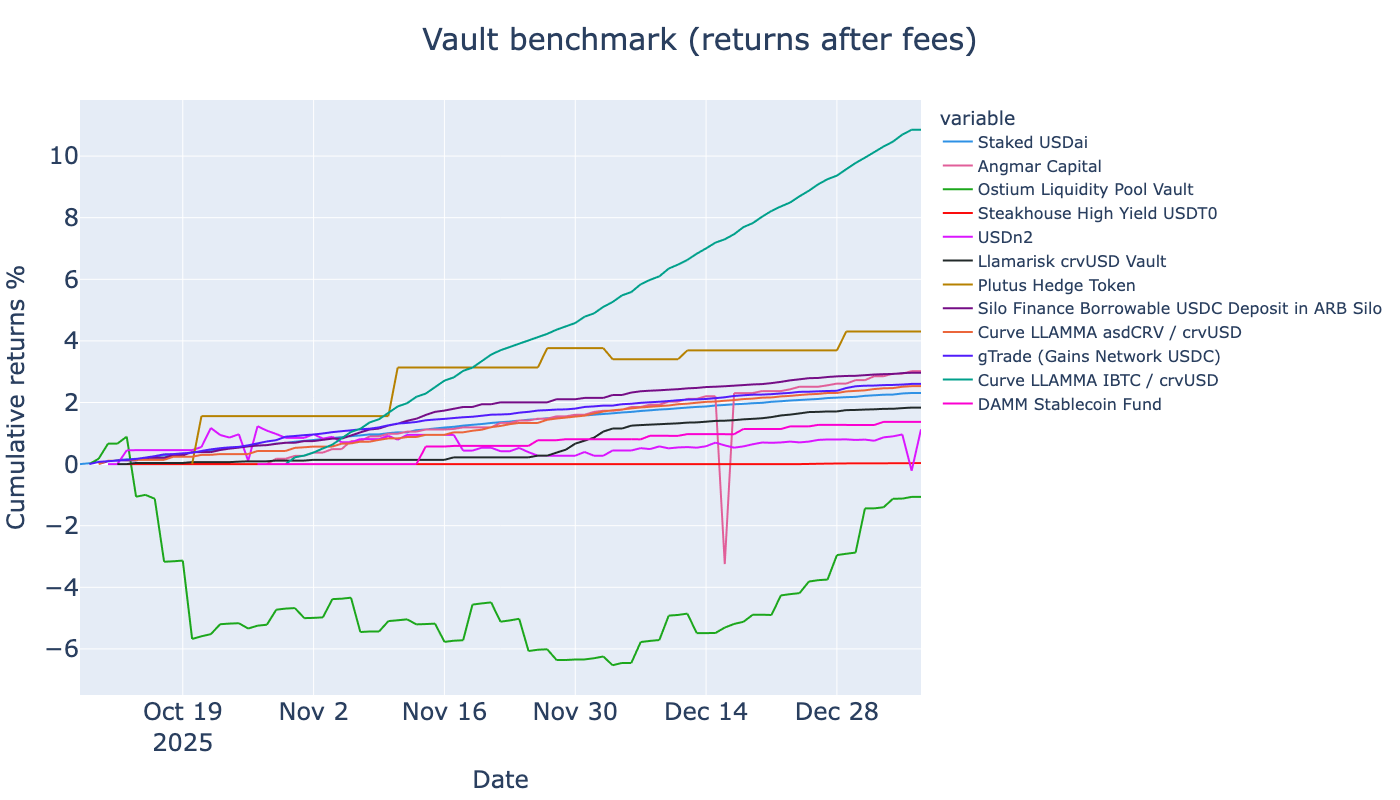

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

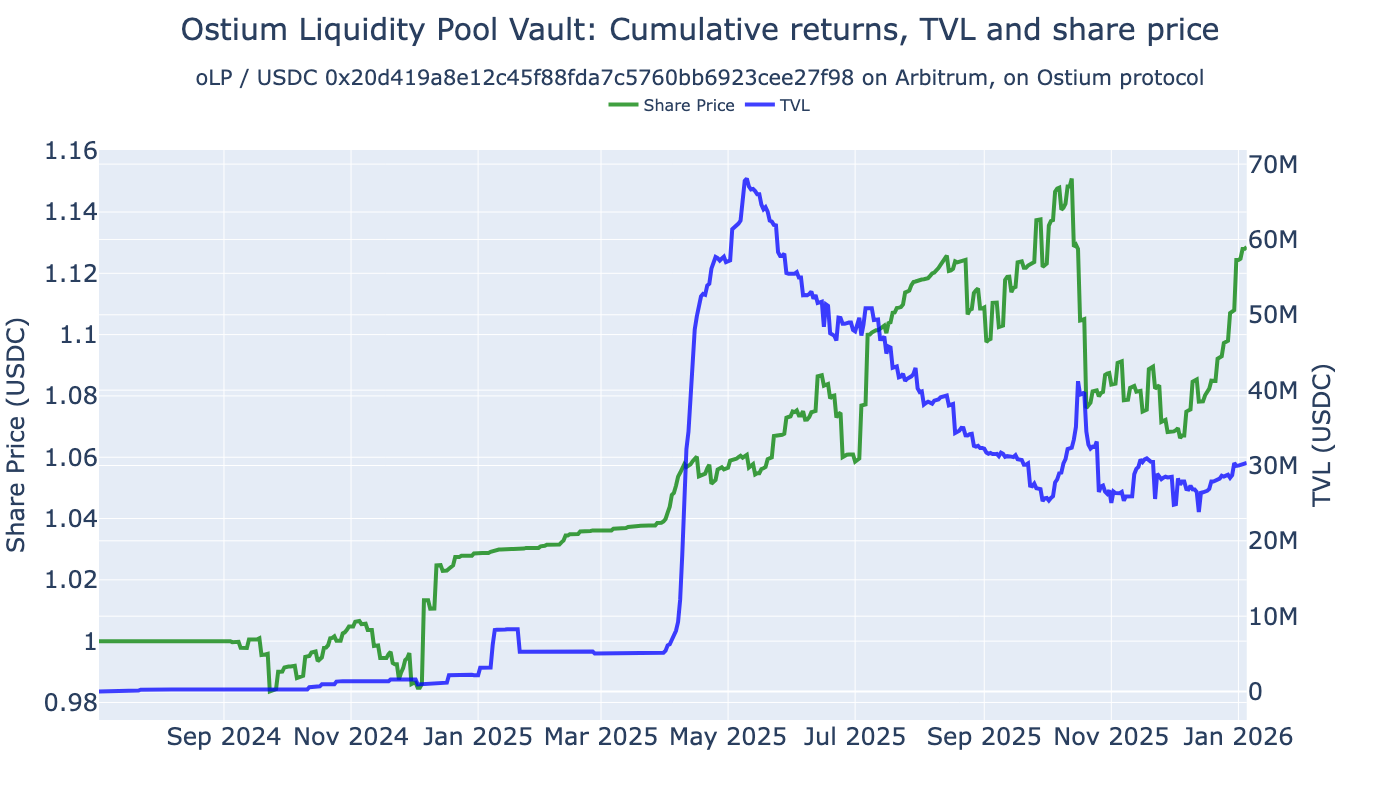

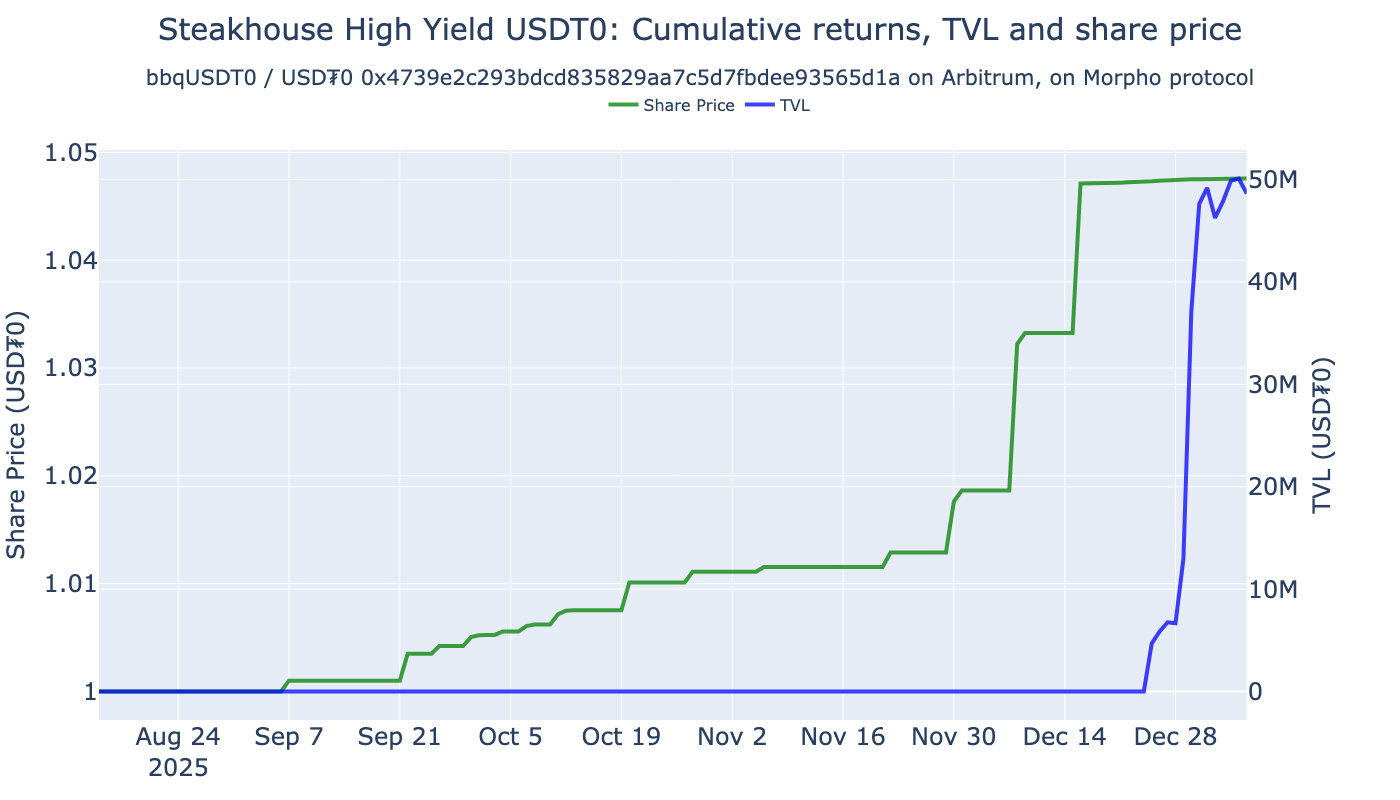

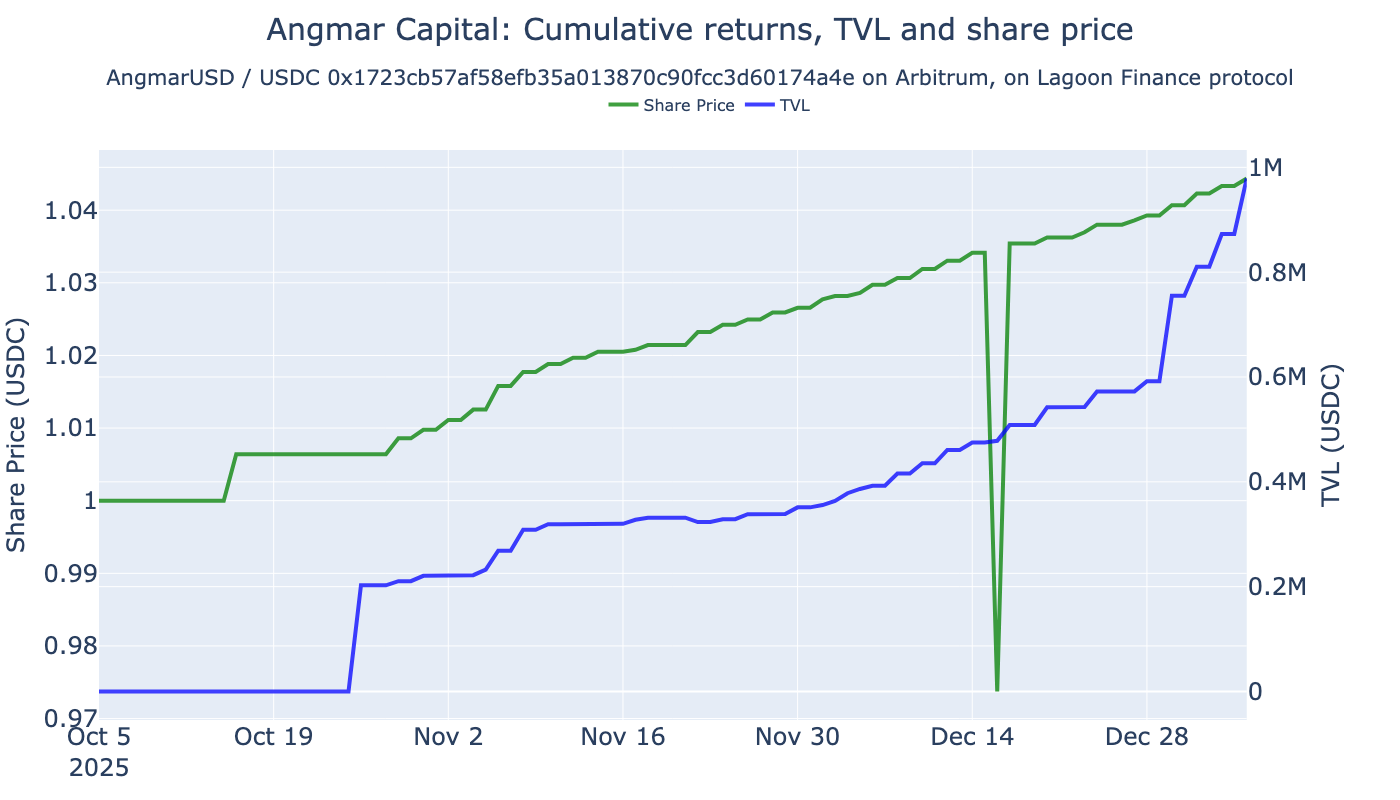

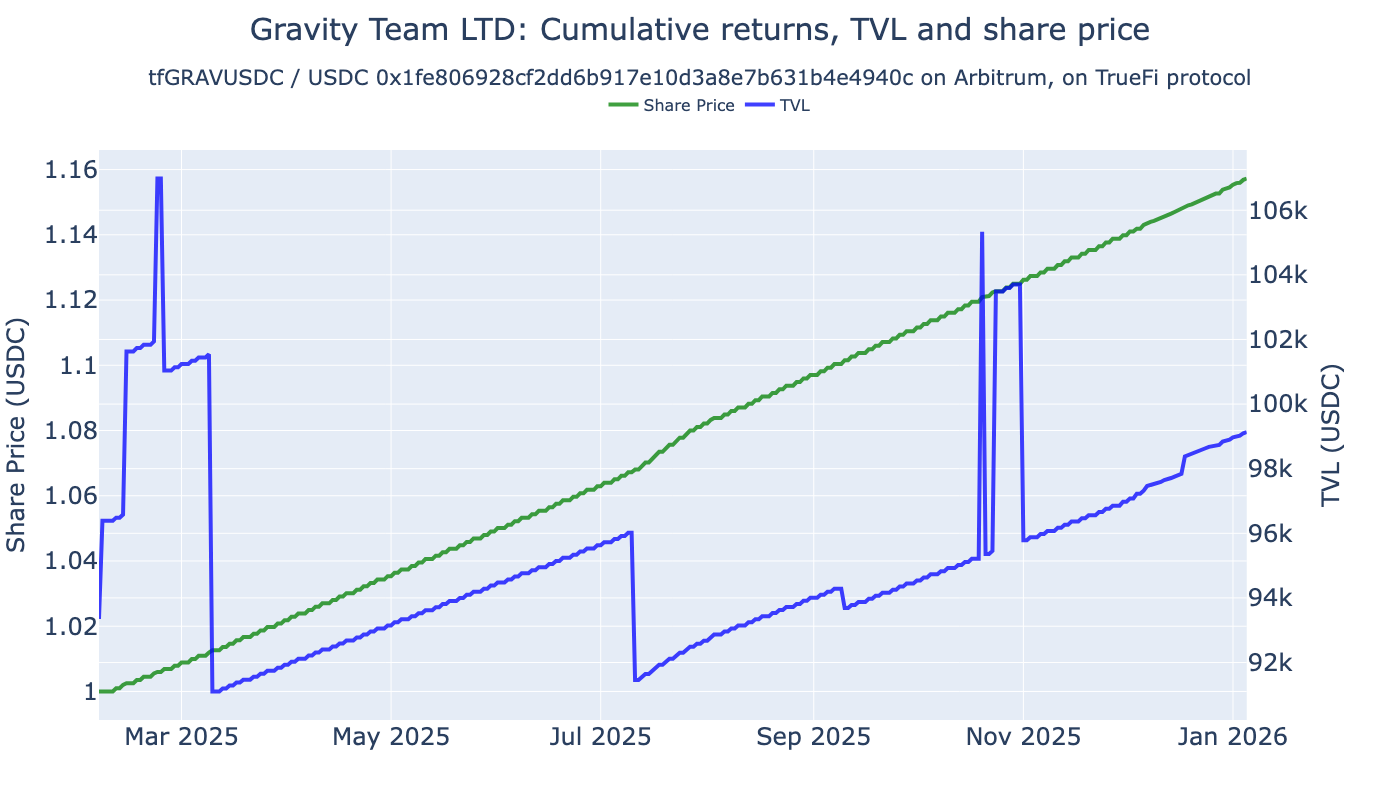

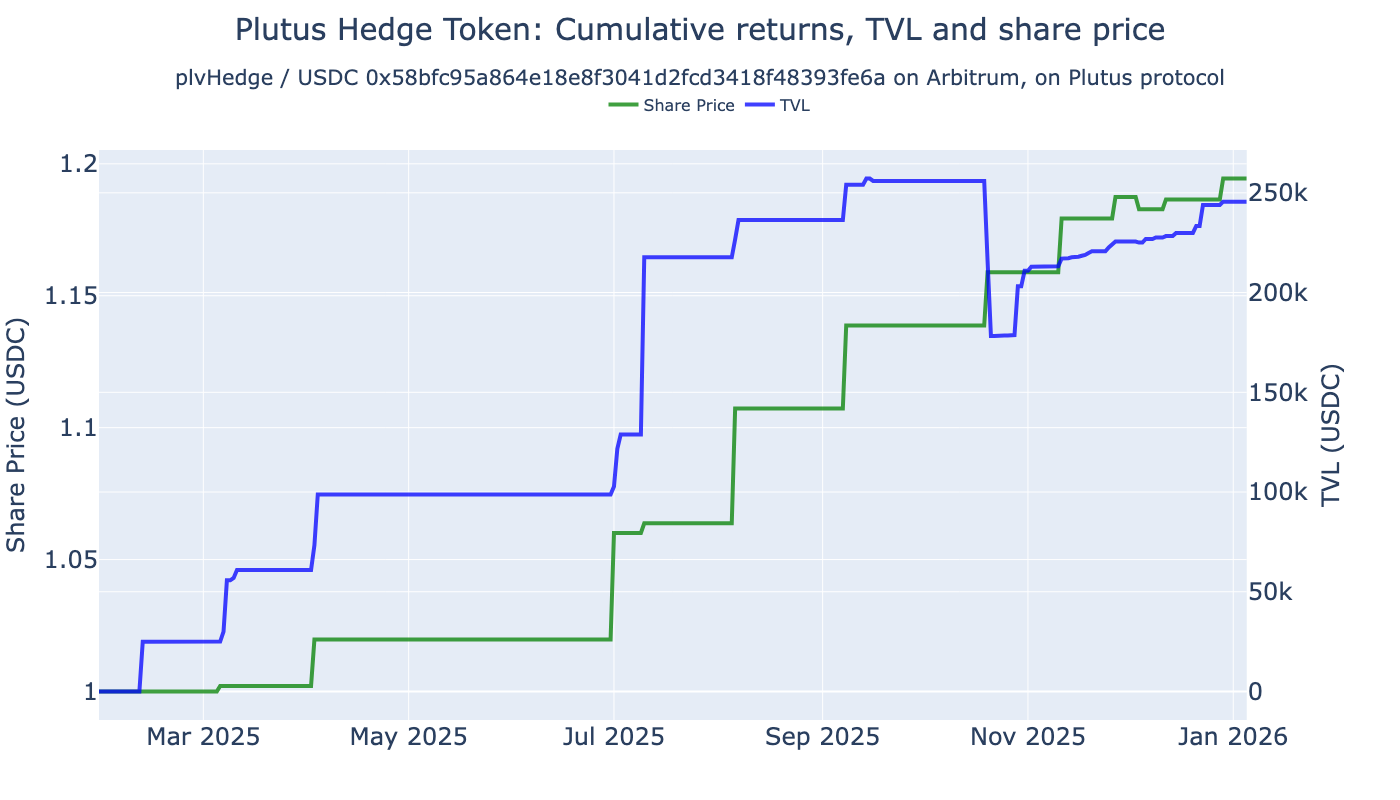

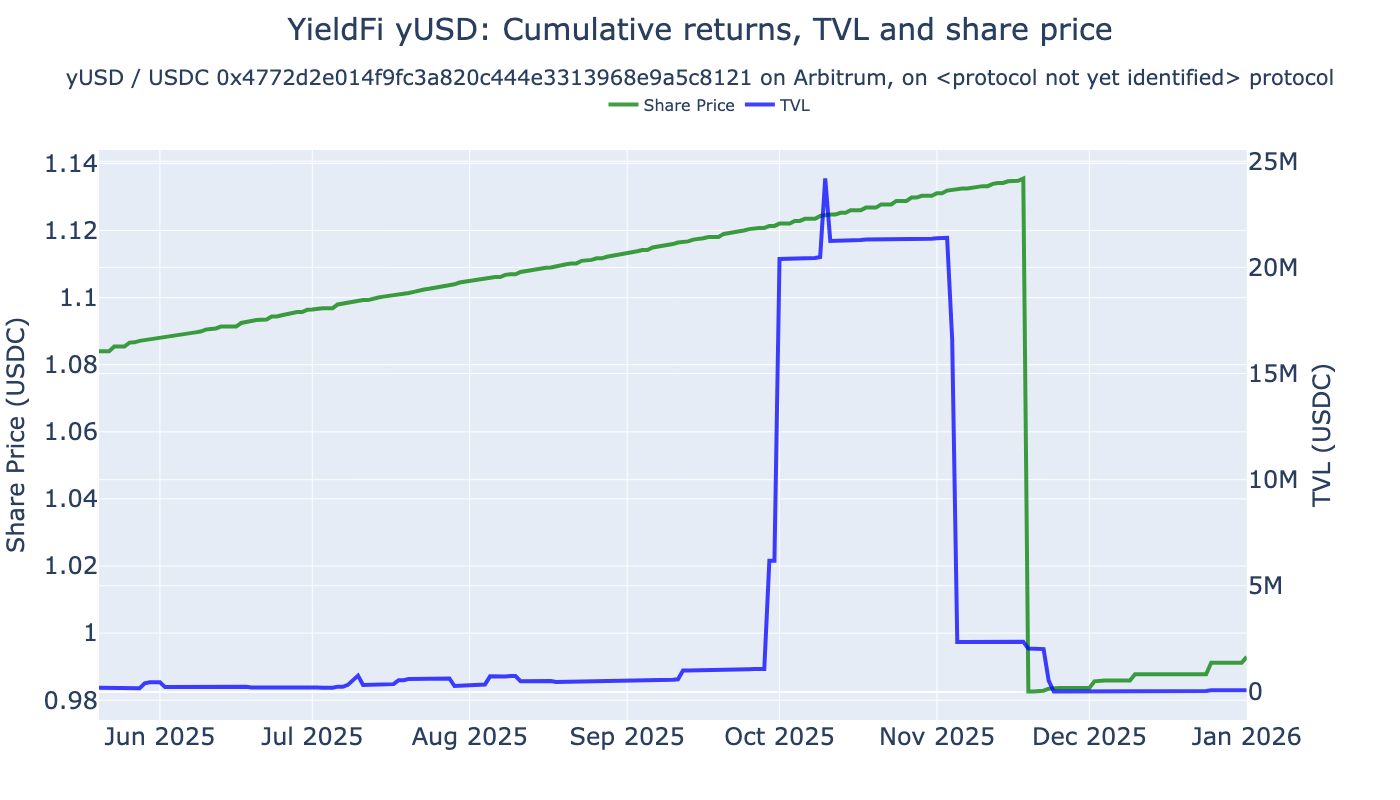

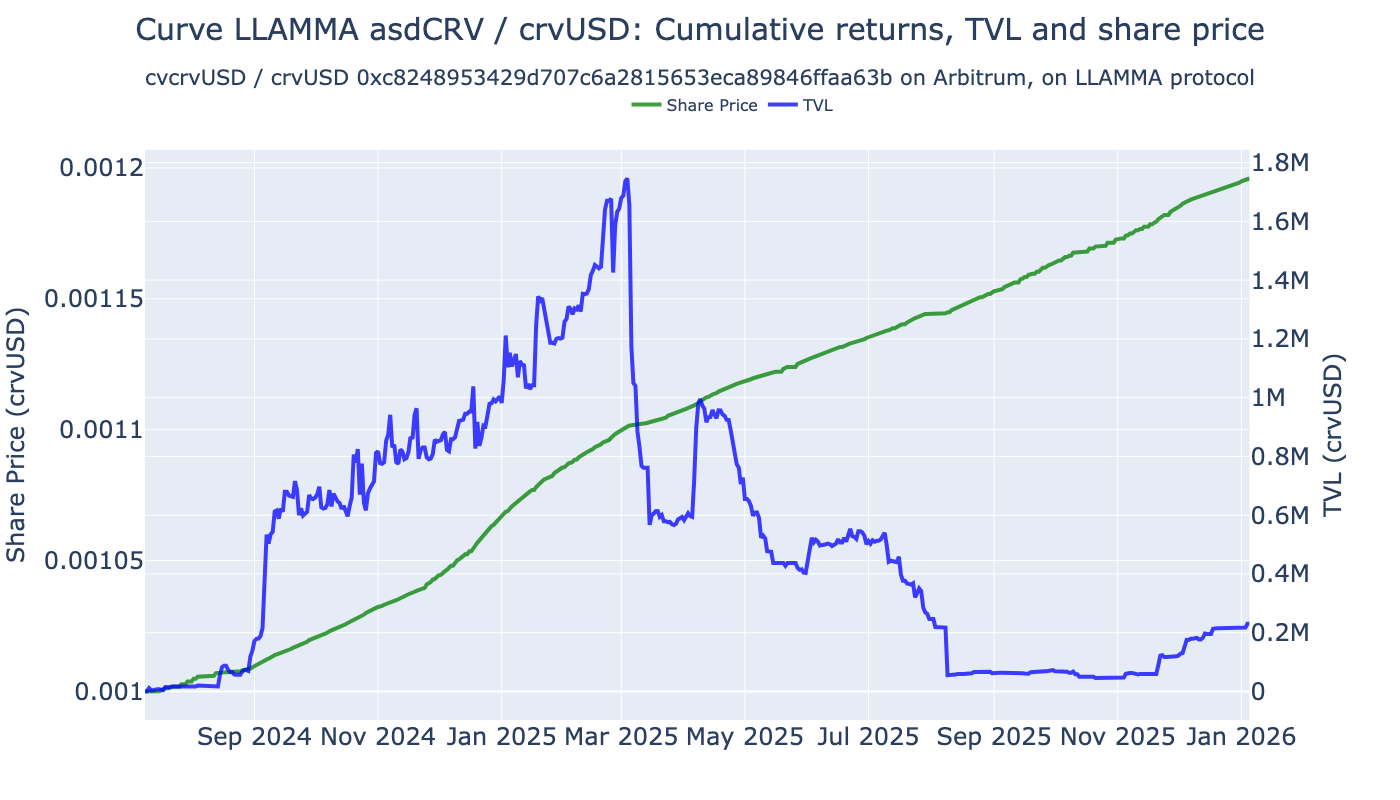

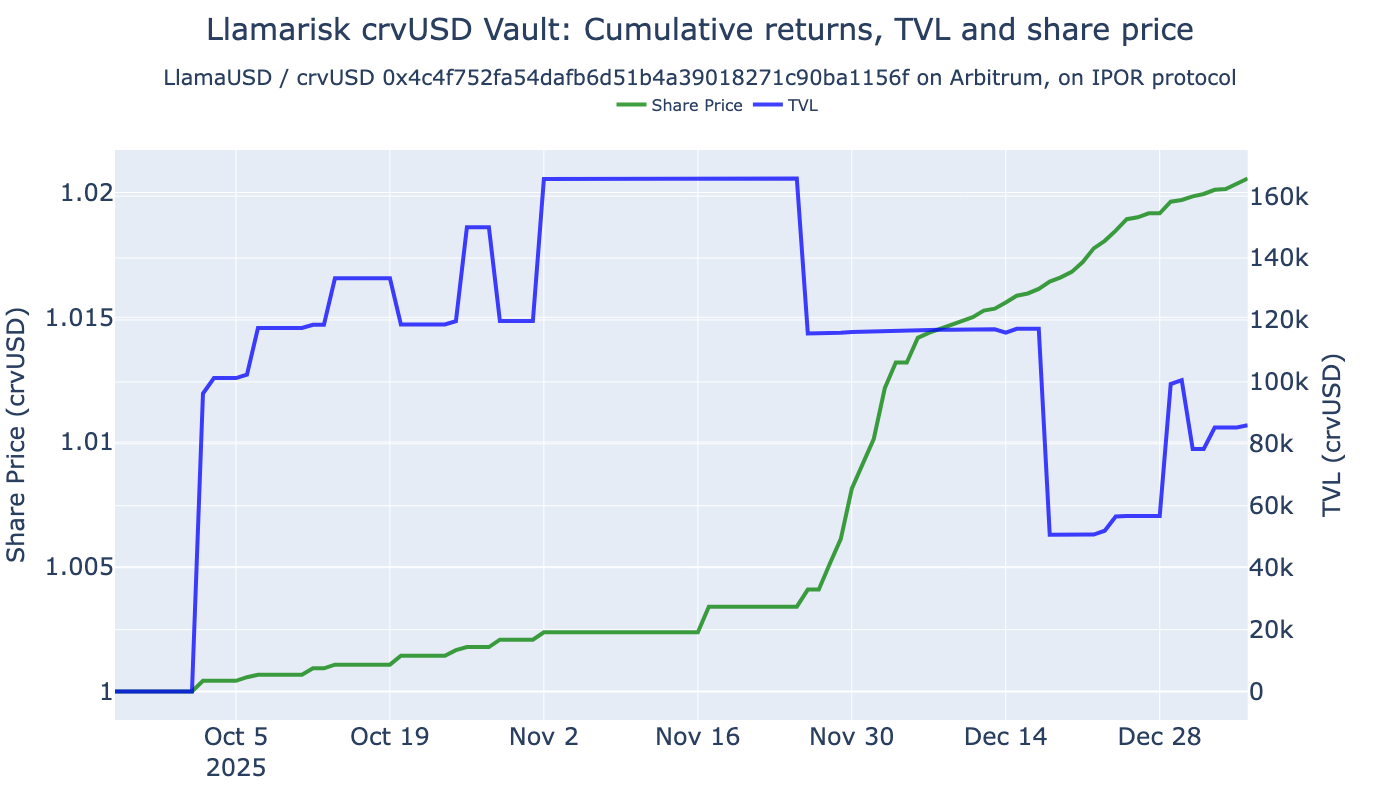

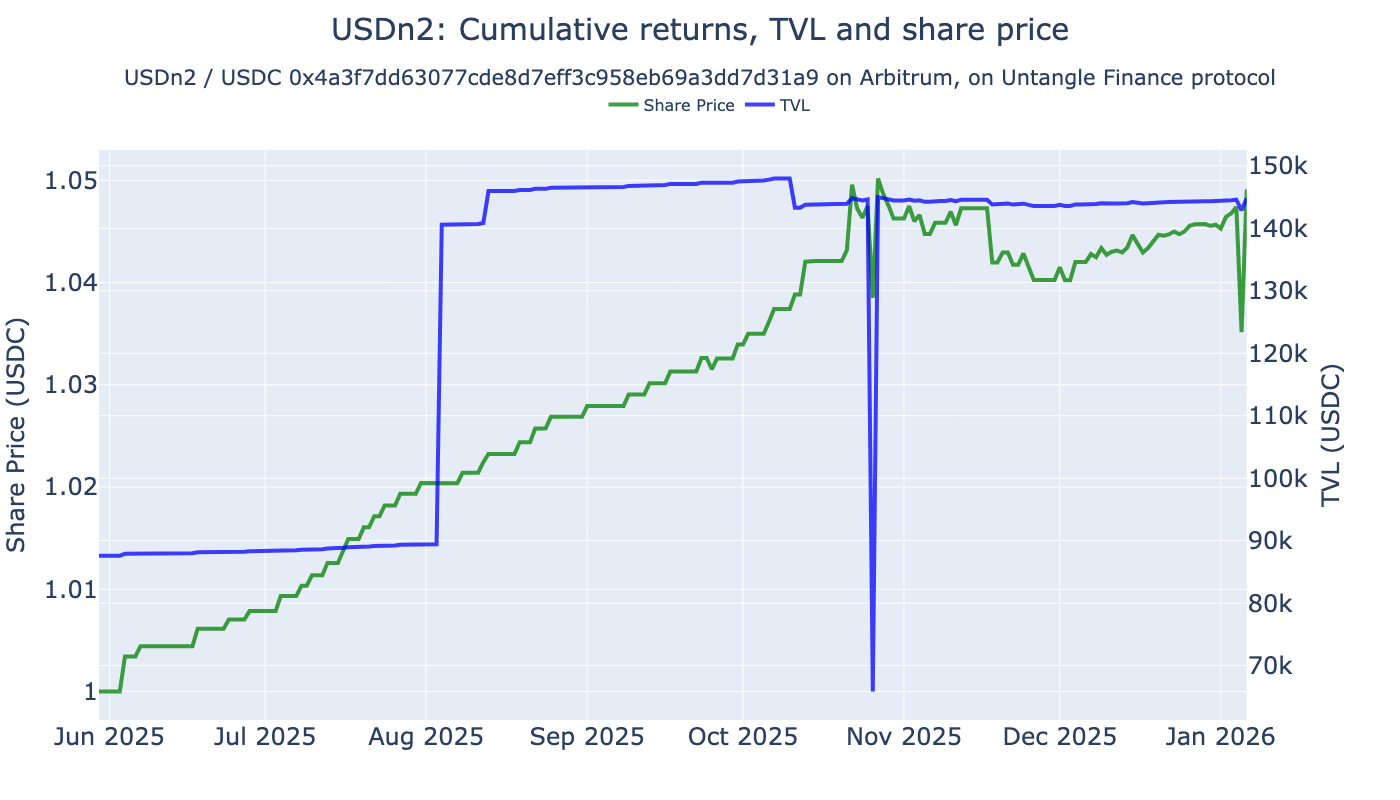

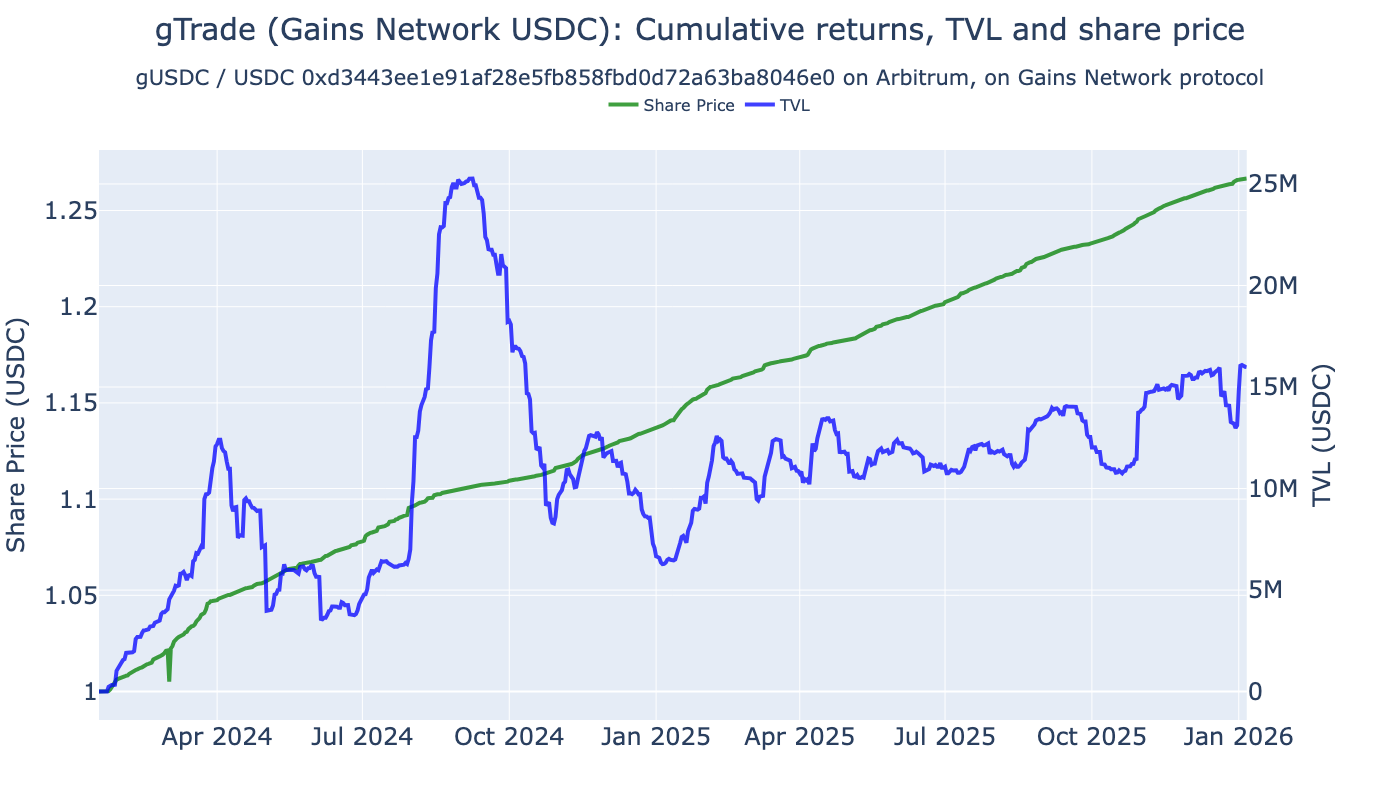

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

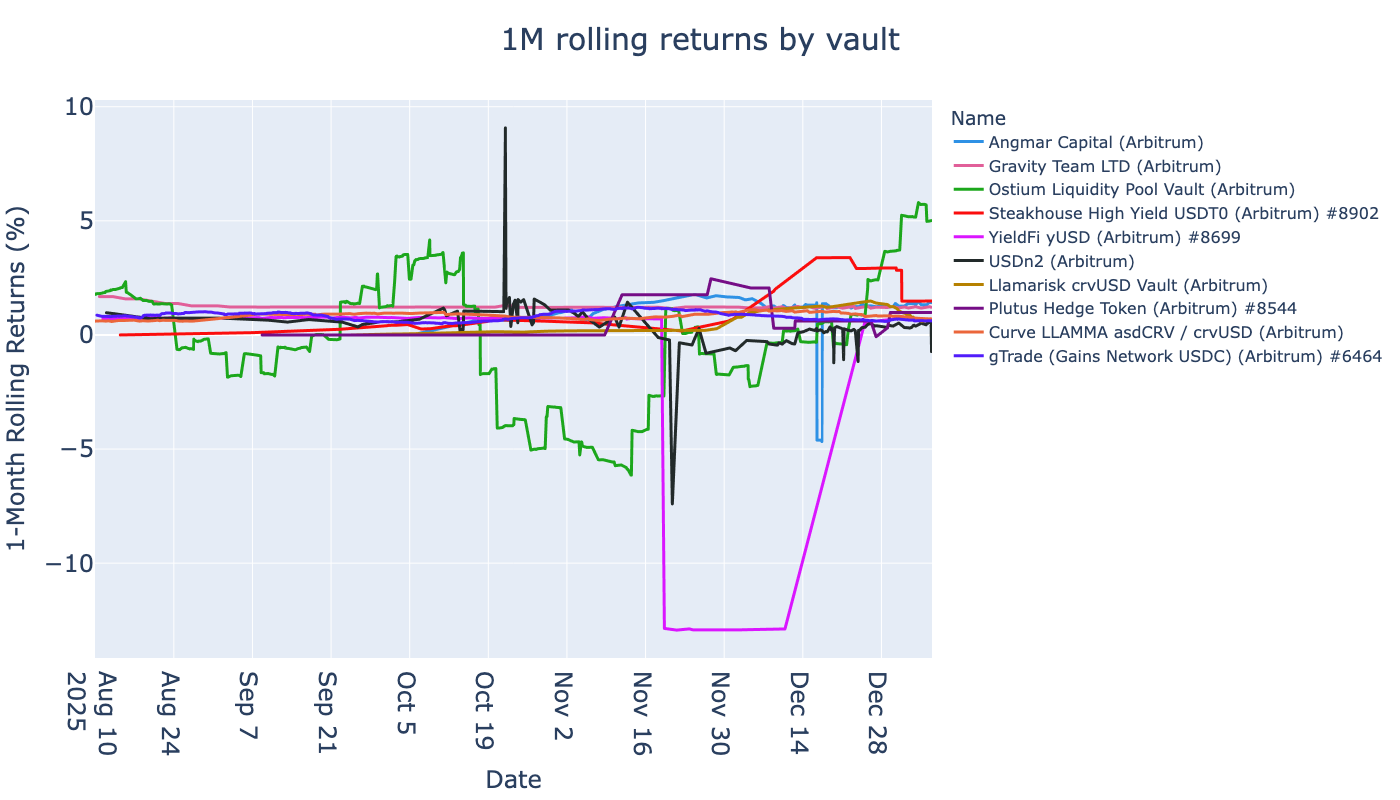

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name Lifetime return abs. (net / gross)  \
#                                                                             
1            Ostium Liquidity Pool Vault                      12.9% (12.9%)   
2            Steakhouse High Yield USDT0                        4.8% (4.8%)   
3                         Angmar Capital                        3.5% (4.4%)   
4                       Gravity Team LTD                        --- (15.7%)   
5                     Plutus Hedge Token                      19.4% (19.4%)   
6                           YieldFi yUSD                        --- (-8.4%)   
7           Curve LLAMMA asdCRV / crvUSD                      19.6% (19.6%)   
8                 Llamarisk crvUSD Vault                        1.9% (2.1%)   
9                                  USDn2                        4.9% (4.9%)   
10           gTrade (Gains Network USDC)                      26.7% (26.7%)   
11                          Staked USDai                        6.2% (6.2%)   
12                  DAMM Stablecoin Fund                        2.2% (2.7%)   
13                 Steakhouse High Yield                         --- (0.4%)   
14                         USDC-2 yVault                      13.3% (13.3%)   
15             Curve LLAMMA ARB / crvUSD                        5.1% (5.1%)   
16                  Yield Chasing crvUSD                        --- (13.0%)   
17  Borrowable USDC Deposit, SiloId: 152                        0.5% (0.5%)   
18                       Euler Theo USDC                        1.8% (1.8%)   
19             Curve LLAMMA CRV / crvUSD                      24.0% (24.0%)   
20                       USDC-APE shares                         --- (0.5%)   
21                 K3 Capital USDai USDC                        2.2% (2.2%)   
22            Revert Lend Arbitrum USDC,                        --- (12.4%)   
23               Yield Chasing Silo USDC                      10.9% (10.9%)   
24                       Euler Earn USDC                        1.9% (1.9%)   
25             Euler Arbitrum Yield USDC                        1.8% (1.8%)   
26             Clearstar High Yield USDC                        1.6% (1.6%)   
27                        Hyperithm USDC                        2.4% (2.4%)   
28                    Yield Chasing USDC                        8.1% (8.1%)   
29                            Saving USX                        --- (12.9%)   
30                Clearstar USDC Reactor                        2.4% (2.4%)   
31                      Yearn Degen USDC                        2.1% (2.1%)   
32                        Tokemak arbUSD                        8.9% (8.9%)   
33                        Dolomite: USDC                         --- (9.0%)   
34                  Thesauros USDC Vault                         --- (1.6%)   
35               Autopilot USDC Arbitrum                    -57.9% (-57.8%)   
36                      Spark USDC Vault                         --- (3.9%)   
37          Harvest: USDC Vault (0xB01a)                      10.1% (10.1%)   
38                    Gauntlet USDC Core                        2.0% (2.0%)   
39                        Dolomite: USDT                         --- (8.8%)   
40                 Steakhouse Prime USDC                        1.7% (1.7%)   
41                  Edge UltraYield USDC                        0.6% (0.6%)   
42                        kpk USDC Yield                        1.2% (1.2%)   
43                           Teller USDC                        0.3% (0.3%)   
44                           dForce USDC                        1.2% (1.2%)   
45                   Euler Arbitrum USDC                        2.3% (2.3%)   
46            Steakhouse High Yield USDC                        1.8% (1.8%)   
47            Static Aave Arbitrum USDCn                        --- (10.6%)   
48                       Summer.fi USD₮0                        3.7% (3.7%)   
49           Wrapped Aave Arbitrum USDCn                         --- (3.5%)   
50     